<a href="https://colab.research.google.com/github/tu22014/EU_M_Math-Repository/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

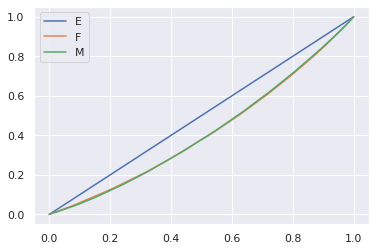

In [18]:
#ライブラリのインポート
import numpy as np
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mp1
import seaborn as sns
sns.set()
%matplotlib inline

#少数第3位まで表記
%precision 3

#(3-2)

# webからデータを習得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
from io import StringIO
import io

# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

#　データをurlから習得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データの読み込み
student_data_math = pd.read_csv('student-mat.csv', sep=';')

#データの抽出
student_data_math_sex_F = student_data_math[student_data_math['sex'] == 'F']
student_data_math_sex_M = student_data_math[student_data_math['sex'] == 'M']

student_data_math_sex_F_G1 = student_data_math_sex_F['G1'].sort_values()
student_data_math_sex_M_G1 = student_data_math_sex_M['G1'].sort_values()

#要素数までの連続した整数の生成
len_F = np.arange(len(student_data_math_sex_F_G1))
len_M = np.arange(len(student_data_math_sex_M_G1))

#ローレンツ曲線
#完全平等
plt.plot(len_F / len_F.max(), len_F / len_F.max(), label ='E')
#「　numpy.cumsum()　」累積和
#累積:各項目のデータ数を足していった数
#累積比率:各項目のデータ数を累積数の合計で割った数値
#横軸は人数の累積比率、縦軸はG1
plt.plot(len_F / len_F.max(), student_data_math_sex_F_G1.cumsum() / student_data_math_sex_F_G1.sum(), label = 'F')
plt.plot(len_M / len_M.max(), student_data_math_sex_M_G1.cumsum() / student_data_math_sex_M_G1.sum(), label = 'M')
#グラフに凡例を表示
plt.legend()
#グリッド表記
plt.grid(True)

In [26]:
#ジニ係数の関数
#「 append() 」 末尾に要素を追加
# abs:絶対値
def heikinsa(data):
  subt = []
  for i in range(0, len(data)-1):
    for j in range(i + 1, len(data)):
      subt.append(np.abs(data[i] - data[j]))
  return float(sum(subt)) * 2 / (len(data) ** 2)

def zini(heikinsa, data):
  return heikinsa / (2 * np.mean(data))

print('男の1期目の成績のジニ係数:', zini(heikinsa(np.array(student_data_math_sex_M_G1)), np.array(student_data_math_sex_M_G1)))
print('女の1期目の成績のジニ係数:', zini(heikinsa(np.array(student_data_math_sex_F_G1)), np.array(student_data_math_sex_F_G1)))

print(len(np.array(student_data_math_sex_M_G1)))

男の1期目の成績のジニ係数: 0.17197351667939903
女の1期目の成績のジニ係数: 0.1723782950865341
187
